# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key, key file is not included in upload, but can be found @ https://openweathermap.org/api
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [90]:
# List for holding lat_lngs and cities
ranlat_lngs = []
cities = []
citylat = []
citylng = []

# Create random set of lat and lng combos
ranlats = np.random.uniform(low=-90.000, high=90.000, size=1500)
ranlngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
ranlat_lngs = zip(ranlats, ranlngs)


# Use Citypy to find nearest city for each lat long
for ranlat_lng in ranlat_lngs:
    city = citipy.nearest_city(ranlat_lng[0], ranlat_lng[1]).city_name
    
# Only add to the list if a unique city is found
    if city not in cities:
        cities.append(city)
        citylat.append(ranlat_lng[0])
        citylng.append(ranlat_lng[1])

# Check counts
print(len(cities))
print(len(citylat))
print(len(citylng))

# Create Dataframe for Cities with lat/long
Cities_df = pd.DataFrame()
Cities_df['City Name'] = cities
Cities_df['Lat'] = citylat
Cities_df['Long'] = citylng

Cities_df

635
635
635


,City Name,Lat,Long
0,geraldton,-31.565694,107.601467
1,yima,34.314714,111.834698
2,port elizabeth,-48.066484,27.614586
3,vaini,-26.512566,-178.741107
4,ondangwa,-18.491970,16.704312
...,...,...,...
630,santa margherita ligure,43.999048,9.062008
631,vila velha,-29.013453,-25.662828
632,hastings,-40.174200,177.926662
633,kariba,-16.213055,29.073126


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
#Add Weather Columns to Cities_df
Cities_df['Temperature'] = 0
Cities_df['Humidity']= 0
Cities_df['Cloudiness']= 0
Cities_df['Wind Speed']= 0


#Begin iterating through dataframe
for i in Cities_df.index:
   
    #pull city name from Cities_df
    city_name = Cities_df['City Name'][i]
    
    #build url
    req_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&APPID={api_key}"

    #console status update
    print(f"Retrieving Results for {city_name}, Index:{i}.")
    
    try: 
        response = requests.get(req_url).json()    
        
        #Print weather check statement
        print(f"The weather in {city_name} is {response['weather'][0]['description']}")
        
              
        #Retrieve Temp, humidity, clouds, and wind speed from JSON file and add to cities_df
        Cities_df['Temperature'][i] = response['main']['temp']
        Cities_df['Humidity'][i] = response['main']['humidity']
        Cities_df['Cloudiness'][i] = response['clouds']['all']
        Cities_df['Wind Speed'][i] = response['wind']['speed']
        

    except (KeyError, IndexError):
        #exception notifies user and drops row
        print("Missing field/result... skipping.")
        Cities_df = Cities_df.drop(i)
        
    print("------------")

Retrieving Results for geraldton, Index:0.
The weather in geraldton is clear sky
------------
Retrieving Results for yima, Index:1.
The weather in yima is clear sky
------------
Retrieving Results for vaini, Index:3.
The weather in vaini is broken clouds

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value i


------------
Retrieving Results for ondangwa, Index:4.
The weather in ondangwa is light rain
------------
Retrieving Results for itarema, Index:5.
The weather in itarema is overcast clouds
------------
Retrieving Results for kodiak, Index:6.
The weather in kodiak is broken clouds
------------
Retrieving Results for khatanga, Index:7.
The weather in khatanga is few clouds
------------
Retrieving Results for sentyabrskiy, Index:8.
Missing field/result... skipping.
------------
Retrieving Results for qaanaaq, Index:9.
The weather in qaanaaq is few clouds
------------
Retrieving Results for victoria, Index:10.
The weather in victoria is scattered clouds
------------
Retrieving Results for rikitea, Index:11.
The weather in rikitea is broken clouds
------------
Retrieving Results for bathsheba, Index:12.
The weather in bathsheba is few clouds
------------
Retrieving Results for arraial do cabo, Index:13.
The weather in arraial do cabo is scattered clouds
------------
Retrieving Results for 

The weather in katsuura is light rain
------------
Retrieving Results for makakilo city, Index:94.
The weather in makakilo city is broken clouds
------------
Retrieving Results for tripoli, Index:95.
The weather in tripoli is clear sky
------------
Retrieving Results for guiratinga, Index:96.
The weather in guiratinga is light rain
------------
Retrieving Results for malwan, Index:97.
Missing field/result... skipping.
------------
Retrieving Results for leningradskiy, Index:98.
The weather in leningradskiy is overcast clouds
------------
Retrieving Results for cherskiy, Index:99.
The weather in cherskiy is scattered clouds
------------
Retrieving Results for rhede, Index:100.
The weather in rhede is overcast clouds
------------
Retrieving Results for georgetown, Index:101.
The weather in georgetown is few clouds
------------
Retrieving Results for hermanus, Index:102.
The weather in hermanus is broken clouds
------------
Retrieving Results for najran, Index:103.
The weather in najran i

Missing field/result... skipping.
------------
Retrieving Results for guarapari, Index:180.
The weather in guarapari is moderate rain
------------
Retrieving Results for sorong, Index:181.
The weather in sorong is few clouds
------------
Retrieving Results for talaya, Index:182.
The weather in talaya is broken clouds
------------
Retrieving Results for morant bay, Index:183.
The weather in morant bay is scattered clouds
------------
Retrieving Results for polunochnoye, Index:184.
The weather in polunochnoye is overcast clouds
------------
Retrieving Results for morlaix, Index:185.
The weather in morlaix is light rain
------------
Retrieving Results for oktyabrskoye, Index:186.
The weather in oktyabrskoye is few clouds
------------
Retrieving Results for huarmey, Index:187.
The weather in huarmey is broken clouds
------------
Retrieving Results for francistown, Index:188.
The weather in francistown is broken clouds
------------
Retrieving Results for amga, Index:189.
The weather in amga

The weather in dunedin is broken clouds
------------
Retrieving Results for zhanatas, Index:264.
Missing field/result... skipping.
------------
Retrieving Results for clarence town, Index:265.
The weather in clarence town is broken clouds
------------
Retrieving Results for naze, Index:266.
The weather in naze is broken clouds
------------
Retrieving Results for eureka, Index:267.
The weather in eureka is light rain
------------
Retrieving Results for kaifeng, Index:268.
The weather in kaifeng is mist
------------
Retrieving Results for mariinsk, Index:269.
The weather in mariinsk is overcast clouds
------------
Retrieving Results for rio gallegos, Index:270.
The weather in rio gallegos is moderate rain
------------
Retrieving Results for kropotkin, Index:271.
The weather in kropotkin is overcast clouds
------------
Retrieving Results for phan thiet, Index:272.
The weather in phan thiet is scattered clouds
------------
Retrieving Results for san francisco, Index:273.
The weather in san

The weather in chanute is clear sky
------------
Retrieving Results for flic en flac, Index:349.
The weather in flic en flac is scattered clouds
------------
Retrieving Results for luwuk, Index:350.
The weather in luwuk is few clouds
------------
Retrieving Results for mounana, Index:351.
The weather in mounana is overcast clouds
------------
Retrieving Results for bolu, Index:352.
The weather in bolu is overcast clouds
------------
Retrieving Results for gorontalo, Index:353.
The weather in gorontalo is scattered clouds
------------
Retrieving Results for louisbourg, Index:354.
Missing field/result... skipping.
------------
Retrieving Results for figeac, Index:355.
The weather in figeac is light rain
------------
Retrieving Results for evensk, Index:356.
The weather in evensk is light snow
------------
Retrieving Results for tubruq, Index:357.
Missing field/result... skipping.
------------
Retrieving Results for champerico, Index:358.
The weather in champerico is scattered clouds
----

The weather in hofn is scattered clouds
------------
Retrieving Results for teguise, Index:434.
The weather in teguise is few clouds
------------
Retrieving Results for serra talhada, Index:435.
The weather in serra talhada is overcast clouds
------------
Retrieving Results for brae, Index:436.
The weather in brae is light rain
------------
Retrieving Results for elko, Index:437.
The weather in elko is scattered clouds
------------
Retrieving Results for ginir, Index:438.
The weather in ginir is light rain
------------
Retrieving Results for hami, Index:439.
The weather in hami is broken clouds
------------
Retrieving Results for kedarnath, Index:440.
Missing field/result... skipping.
------------
Retrieving Results for tessalit, Index:441.
The weather in tessalit is overcast clouds
------------
Retrieving Results for sabang, Index:442.
The weather in sabang is light rain
------------
Retrieving Results for sao joao do piaui, Index:443.
The weather in sao joao do piaui is overcast clou

The weather in nantucket is overcast clouds
------------
Retrieving Results for taft, Index:520.
The weather in taft is clear sky
------------
Retrieving Results for sao jose da coroa grande, Index:521.
The weather in sao jose da coroa grande is overcast clouds
------------
Retrieving Results for manicore, Index:522.
The weather in manicore is light rain
------------
Retrieving Results for maningrida, Index:523.
The weather in maningrida is light rain
------------
Retrieving Results for kindia, Index:524.
The weather in kindia is broken clouds
------------
Retrieving Results for raudeberg, Index:525.
The weather in raudeberg is light rain
------------
Retrieving Results for antalaha, Index:526.
The weather in antalaha is light rain
------------
Retrieving Results for fare, Index:527.
The weather in fare is moderate rain
------------
Retrieving Results for alibag, Index:528.
The weather in alibag is mist
------------
Retrieving Results for clarksburg, Index:529.
The weather in clarksbur

The weather in kautokeino is overcast clouds
------------
Retrieving Results for roald, Index:608.
The weather in roald is overcast clouds
------------
Retrieving Results for imbituba, Index:609.
The weather in imbituba is broken clouds
------------
Retrieving Results for springfield, Index:610.
The weather in springfield is clear sky
------------
Retrieving Results for paamiut, Index:611.
The weather in paamiut is clear sky
------------
Retrieving Results for naryan-mar, Index:612.
The weather in naryan-mar is broken clouds
------------
Retrieving Results for foumban, Index:613.
The weather in foumban is clear sky
------------
Retrieving Results for meulaboh, Index:614.
The weather in meulaboh is overcast clouds
------------
Retrieving Results for richards bay, Index:615.
The weather in richards bay is light rain
------------
Retrieving Results for moengo, Index:616.
The weather in moengo is overcast clouds
------------
Retrieving Results for buariki, Index:617.
Missing field/result..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [131]:
#save to csv

Cities_df.to_csv("CityWeather.csv")


In [132]:
#Display Dataframe

Cities_df

,City Name,Lat,Long,Temperature,Humidity,Cloudiness,Wind Speed
0,geraldton,-31.565694,107.601467,78,69,0,10
1,yima,34.314714,111.834698,33,66,0,7
3,vaini,-26.512566,-178.741107,80,88,75,4
4,ondangwa,-18.491970,16.704312,69,88,90,13
5,itarema,6.921812,-38.149329,78,85,86,4
...,...,...,...,...,...,...,...
630,santa margherita ligure,43.999048,9.062008,50,82,75,14
631,vila velha,-29.013453,-25.662828,75,94,90,4
632,hastings,-40.174200,177.926662,41,93,40,9
633,kariba,-16.213055,29.073126,70,88,60,4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

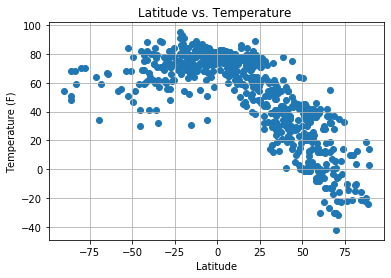

In [138]:
plt.scatter(Cities_df['Lat'],Cities_df['Temperature'])

plt.title("Latitude vs. Temperature ")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

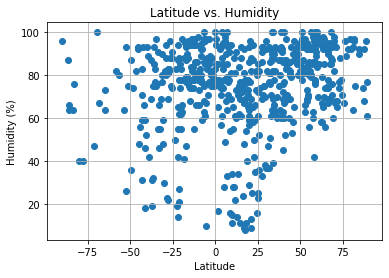

In [139]:
plt.scatter(Cities_df['Lat'],Cities_df['Humidity'])

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("LatvsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

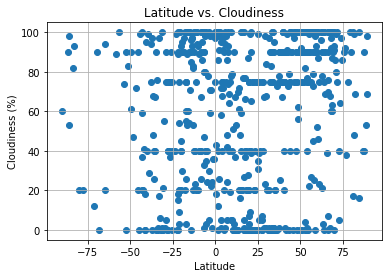

In [141]:
plt.scatter(Cities_df['Lat'],Cities_df['Cloudiness'],)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("LatvsClouds.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

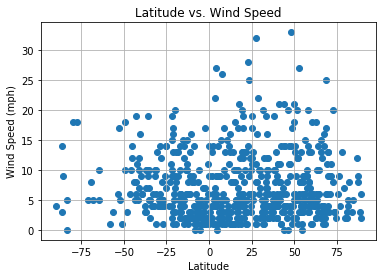

In [140]:
plt.scatter(Cities_df['Lat'],Cities_df['Wind Speed'])


plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("LatvsWind.png")

# Show plot
plt.show()